In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from tqdm import tqdm_notebook as tqdm
import re
import ast
import scipy.stats as sp
import matplotlib.pyplot as plt

## Dataframe Cleaning

In [2]:
df = pd.read_csv("../tokenized-data.csv")

In [3]:
# dropping index column that was passed along
df = df.drop(df.columns[0], axis=1)

In [4]:
df = df.drop(['key_0', 'fullname', 'html', 'tweet_id', 'tweet_url', 'user_id', 'username', 'url_y', 'timestamp_epochs', \
         'is_retweet', 'likes', 'replies', 'retweet_id', 'retweeter_userid', 'retweeter_username', 'url_x', 'text_x', \
         'text_y'], axis=1)

In [5]:
print("getting rid of " + str(len(df) - len(df.dropna(how='any',axis=0))) + " null columns")
df = df.dropna(how='any',axis=0)

getting rid of 0 null columns


In [6]:
for i in range(len(df)):
    df.named_entity[i] = ast.literal_eval(df.named_entity[i])
    df.tokenized_words[i] = ast.literal_eval(df.tokenized_words[i])

/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
display(df[0:3])

,retweets,timestamp,tokenized_words,word_count,tokenized_sentences,text_words_removed,lemmas,word_freq,part_of_speech,named_entity
0,54,2019-10-14 23:45:05,"[Cara, Buckley, Tyler, Perry, hears, voices, i...",1332,[Cara Buckley Tyler Perry hears voices in his ...,"['Cara', 'Buckley', 'Tyler', 'Perry', 'hears',...","{Cara: 'Cara', Buckley: 'Buckley', Tyler: 'Tyl...","Counter({'Perry': 23, 'said': 13, 'black': 12,...","{Cara: 'PROPN', Buckley: 'PROPN', Tyler: 'PROP...","{'LAW': ['the Ultimate Icon Award '], 'TIME': ..."
1,18,2019-10-14 23:30:07,"[Robert, Leonard, Mr, Leonard, is, the, author...",1160,[Robert Leonard Mr Leonard is the author of De...,"['Robert', 'Leonard', 'Mr', 'Leonard', 'author...","{Robert: 'Robert', Leonard: 'Leonard', Mr: 'Mr...","Counter({'Mr': 16, 'Trump': 12, 'King': 9, 'Io...","{Robert: 'PROPN', Leonard: 'PROPN', Mr: 'PROPN...","{'TIME': ['the morning ', 'the evening '], 'PR..."
2,39,2019-10-14 23:15:04,"[Shuhan, Fan, and, Luther, Clement, Ms, Fan, a...",237,"[Shuhan Fan and Luther Clement, Ms Fan and Mr ...","['Shuhan', 'Fan', 'Luther', 'Clement', 'Ms', '...","{Shuhan: 'Shuhan', Fan: 'Fan', and: 'and', Lut...","Counter({'film': 6, 'Keeth': 5, 'Fan': 2, 'Lut...","{Shuhan: 'PROPN', Fan: 'PROPN', and: 'CCONJ', ...","{'ORG': ['Peter Westbrook Foundation ', 'the P..."


In [8]:
df.part_of_speech[0]

"{Cara: 'PROPN', Buckley: 'PROPN', Tyler: 'PROPN', Perry: 'PROPN', hears: 'VERB', voices: 'NOUN', in: 'ADP', his: 'PRON', head: 'NOUN', and: 'CCONJ', they: 'PRON', have: 'AUX', made: 'VERB', him: 'PRON', wildly: 'ADV', popular: 'ADJ', divisive: 'ADJ', and: 'CCONJ', very: 'ADV', rich: 'ADJ', The: 'DET', voices: 'NOUN', created: 'VERB', the: 'DET', Paynes: 'PROPN', the: 'DET', Browns: 'PROPN', the: 'DET', Cryers: 'PROPN', and: 'CCONJ', countless: 'ADJ', other: 'ADJ', characters: 'NOUN', and: 'CCONJ', caricatures: 'NOUN', that: 'PRON', peopled: 'VERB', Perrys: 'PROPN', plays: 'VERB', movies: 'NOUN', and: 'CCONJ', television: 'NOUN', series: 'NOUN', And: 'CCONJ', they: 'PRON', unleashed: 'VERB', his: 'PRON', golden: 'ADJ', goose: 'NOUN', Madea: 'PROPN', the: 'DET', smacktalking: 'VERB', pursewielding: 'VERB', black: 'ADJ', Southern: 'ADJ', matriarch: 'NOUN', that: 'SCONJ', Perry: 'PROPN', depicted: 'VERB', in: 'ADP', tent: 'NOUN', dresses: 'NOUN', and: 'CCONJ', a: 'DET', pendulous: 'ADJ', 

In [9]:
df.named_entity[19]

{'PRODUCT': ['Facebook '],
 'ORG': ['the Ohio Department of Natural Resources ',
  'The Dayton Daily News ',
  'The Chillicothe Gazette ',
  'the Hocking County Sheriffs Office ',
  'Ms Schafers '],
 'GPE': ['Columbus ',
  'Victoria ',
  'Ohio ',
  'Logan ',
  'Hocking Hills State Park '],
 'CARDINAL': ['One ', '10000 ', 'six ', '2 ', 'two ', 'one '],
 'DATE': ['Friday ',
  'Sunday ',
  'the day ',
  'Weeks ',
  'Thursday ',
  'that day '],
 'PERSON': ['Mary Mertz ',
  'Aimee Ortiz ',
  'Victoria Schafer ',
  'John ',
  'Gazette ',
  'Ms Schafers ',
  'Ms Schafer ',
  'Victoria Schafer Photography '],
 'FAC': ['the Multi County Juvenile Detention Center ', 'Lancaster Ohio '],
 'QUANTITY': ['about 50 miles ', 'more than 30 miles ']}

## Feature Selection

In [10]:
# getting counts for parts of speech

noun_count = []
adv_count = []
verb_count = []
adj_count = []
for i in range(len(df)):
    noun_count.append(df.part_of_speech[i].count('NOUN'))
    adv_count.append(df.part_of_speech[i].count('ADV'))
    adj_count.append(df.part_of_speech[i].count('ADJ'))
    verb_count.append(df.part_of_speech[i].count('VERB'))
    
df['noun_count'] = noun_count
df['adj_count'] = adj_count
df['adv_count'] = adv_count
df['verb_count'] = verb_count

In [11]:
def get_avg_reps(string):
    # string = str(df.word_freq[5])
    l = [int(i.group()) for i in re.finditer("[-+]?\d+", string)]
    
    r = []
    for i, num in enumerate(l):
        if num>l[0]:
            l.remove(num)
            
    return np.average(l)

In [12]:
reps = []
for i in range(len(df)):
    reps.append(get_avg_reps(df.word_freq[i]))

df['avg_word_freq'] = reps

/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
def get_num_entities(string):
    return sum([len(value) for key, value in string.items()])

In [14]:
num_entities = []
num_people = [] 

for i in range(len(df)):
    num_entities.append(get_num_entities(df.named_entity[i]))
    
    try: 
        num_people.append(len(df.named_entity[i]['PERSON']))
    except:
        num_people.append(0)
        pass

df['num_entities'] = num_entities
df['num_people'] = num_people

In [15]:
avg_word_len = []
avg_word_sd = []
avg_word_skew = []
avg_word_kur = []
for i in range(len(df)):
    lengths = [len(i) for i in df.tokenized_words[i]]
    avg_word_len.append(np.average(lengths))
    avg_word_sd.append(np.std(lengths))
    avg_word_skew.append(sp.skew(lengths))
    avg_word_kur.append(sp.kurtosis(lengths))
    
df['avg_word_len'] = avg_word_len
df['avg_word_sd'] = avg_word_sd
df['avg_word_skew'] = avg_word_skew
df['avg_word_kur'] = avg_word_kur

/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
def get_name(df, entity, topic):
    result = pd.DataFrame(columns = df.columns)
    data = []
    for i in range(len(df)):
        try:
            for j in range(len(df.named_entity[i][entity])):
                if df.named_entity[i][entity][j] == topic:
                    data.append(i)
        except:
            pass
    
    
    
    return df.iloc[data, :]

In [17]:
trump = get_name(df, 'PERSON', 'Trump ')
display(trump[0:3])

,retweets,timestamp,tokenized_words,word_count,tokenized_sentences,text_words_removed,lemmas,word_freq,part_of_speech,named_entity,...,adj_count,adv_count,verb_count,avg_word_freq,num_entities,num_people,avg_word_len,avg_word_sd,avg_word_skew,avg_word_kur
1,18,2019-10-14 23:30:07,"[Robert, Leonard, Mr, Leonard, is, the, author...",1160,[Robert Leonard Mr Leonard is the author of De...,"['Robert', 'Leonard', 'Mr', 'Leonard', 'author...","{Robert: 'Robert', Leonard: 'Leonard', Mr: 'Mr...","Counter({'Mr': 16, 'Trump': 12, 'King': 9, 'Io...","{Robert: 'PROPN', Leonard: 'PROPN', Mr: 'PROPN...","{'TIME': ['the morning ', 'the evening '], 'PR...",...,89,61,118,1.448529,70,25,4.722414,2.655933,1.183618,1.660002
9,147,2019-10-14 21:35:03,"[Patrick, Kingsley, The, Turkish, invasion, of...",1144,"[Patrick Kingsley, The Turkish invasion of Kur...","['Patrick', 'Kingsley', 'Turkish', 'invasion',...","{Patrick: 'Patrick', Kingsley: 'Kingsley', The...","Counter({'Syrian': 15, 'Turkey': 15, 'Kurdish'...","{Patrick: 'PROPN', Kingsley: 'PROPN', The: 'DE...","{'PRODUCT': ['Kurdishheld '], 'ORG': ['the Syr...",...,142,48,119,1.744737,63,6,5.076049,2.636879,0.706551,0.084566
14,181,2019-10-14 20:35:46,"[Sarah, Almukhtar, Allison, Mc, Cann, and, Anj...",2035,[Sarah Almukhtar Allison Mc Cann and Anjali Si...,"['Sarah', 'Almukhtar', 'Allison', 'Mc', 'Cann'...","{Sarah: 'Sarah', Almukhtar: 'Almukhtar', Allis...","Counter({'said': 30, 'Turkish': 20, 'Mr': 16, ...","{Sarah: 'PROPN', Almukhtar: 'PROPN', Allison: ...","{'TIME': ['Monday night ', 'Sunday night ', 'o...",...,188,64,235,1.771212,148,36,5.072727,2.544854,0.607579,0.062028


In [18]:
china = get_name(df, 'GPE', 'China ')
display(china[0:3])

,retweets,timestamp,tokenized_words,word_count,tokenized_sentences,text_words_removed,lemmas,word_freq,part_of_speech,named_entity,...,adj_count,adv_count,verb_count,avg_word_freq,num_entities,num_people,avg_word_len,avg_word_sd,avg_word_skew,avg_word_kur
26,33,2019-10-14 17:40:09,"[John, Branch, The, myth, of, sports, sticking...",1327,"[John Branch, The myth of sports sticking to s...","['John', 'Branch', 'myth', 'sports', 'sticking...","{John: 'John', Branch: 'Branch', The: 'the', m...","Counter({'sports': 22, 'China': 13, 'week': 8,...","{John: 'PROPN', Branch: 'PROPN', The: 'DET', m...","{'LAW': ['Game 7 '], 'TIME': ['midnight '], 'P...",...,77,70,157,1.355899,81,19,4.855313,2.619016,0.961747,0.713965
30,47,2019-10-14 17:00:16,"[Matt, Phillips, Wall, Streets, eternally, opt...",783,[Matt Phillips Wall Streets eternally optimist...,"['Matt', 'Phillips', 'Wall', 'Streets', 'etern...","{Matt: 'Matt', Phillips: 'Phillips', Wall: 'Wa...","Counter({'companies': 7, 'profits': 7, 'growth...","{Matt: 'PROPN', Phillips: 'PROPN', Wall: 'PROP...","{'ORG': ['Bank of America ', 'Bank of America ...",...,70,36,108,1.455516,49,5,4.939974,2.502152,0.821453,0.356846
35,56,2019-10-14 16:12:08,"[Michael, Forsythe, David, Enrich, and, Alexan...",3511,[Michael Forsythe David Enrich and Alexandra S...,"['Michael', 'Forsythe', 'David', 'Enrich', 'Al...","{Michael: 'Michael', Forsythe: 'Forsythe', Dav...","Counter({'Mr': 67, 'bank': 37, 'Deutsche': 36,...","{Michael: 'PROPN', Forsythe: 'PROPN', David: '...",{'LAW': ['the Foreign Corrupt Practices Act ']...,...,236,113,415,2.201064,210,64,4.918257,2.645673,0.784474,-0.008584


In [19]:
iowa = get_name(df, 'GPE', 'Iowa ')
iowa.shape

(415, 21)

In [22]:
df.to_pickle("feature_df.pkl")

## Plotting 

In [20]:
from sklearn.preprocessing import normalize 

In [24]:
df = pd.read_pickle("feature_df.pkl")

In [25]:
def plot(df):
    print("getting rid of " + str(len(df) - len(df.dropna(how='any',axis=0))) + " null columns")
    df = df.dropna(how='any',axis=0)

    X = df[['word_count', 'noun_count', 'adj_count',
           'adv_count', 'verb_count', 'avg_word_freq', 'num_entities',
           'num_people', 'avg_word_len', 'avg_word_sd', 'avg_word_skew',
           'avg_word_kur']].copy().values

    y = df[['retweets']].copy().values

    titles = ['word_count', 'noun_count', 'adj_count',
           'adv_count', 'verb_count', 'avg_word_freq', 'num_entities',
           'num_people', 'avg_word_len', 'avg_word_sd', 'avg_word_skew',
           'avg_word_kur']

    fig = plt.figure(figsize = (20,18))
    for i in range(12):
        ax = fig.add_subplot(4, 3, i+1)
        ax.plot(X[:, i], y, 'o')
        ax.set_title(titles[i] + " vs retweets")

getting rid of 18 null columns


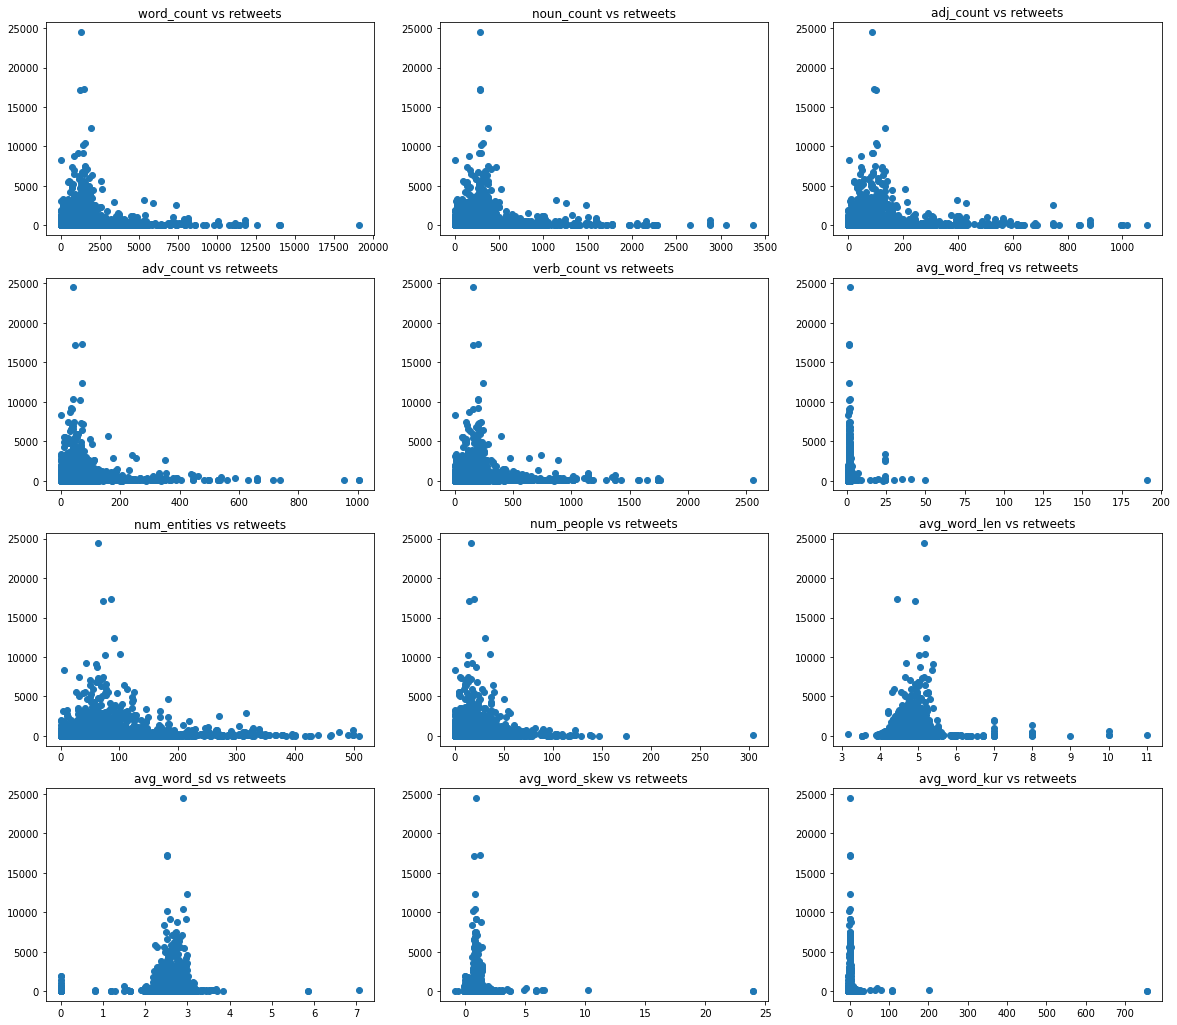

In [26]:
plot(df)

getting rid of 0 null columns


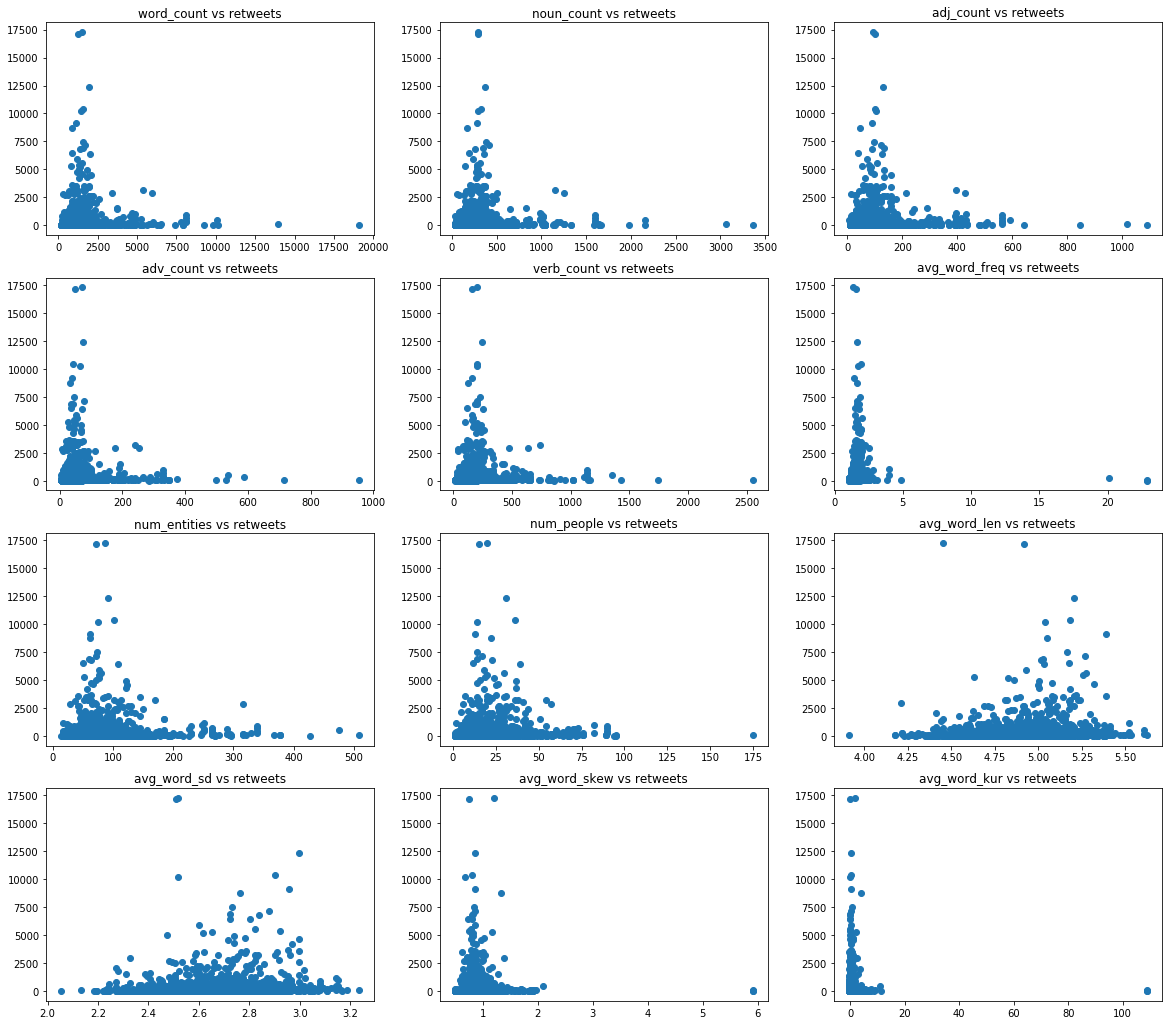

In [27]:
plot(trump)

getting rid of 0 null columns


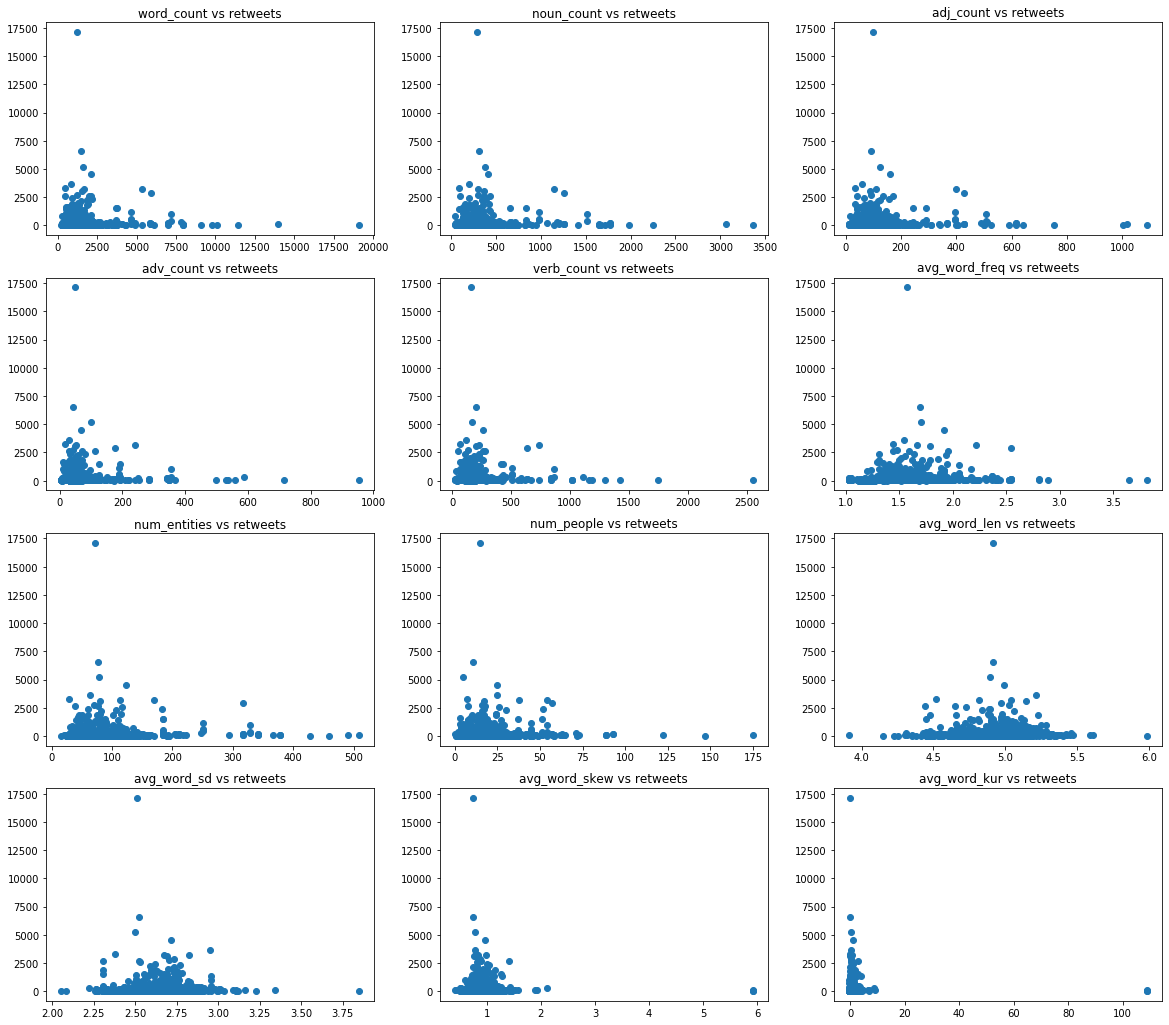

In [28]:
plot(china)

getting rid of 0 null columns


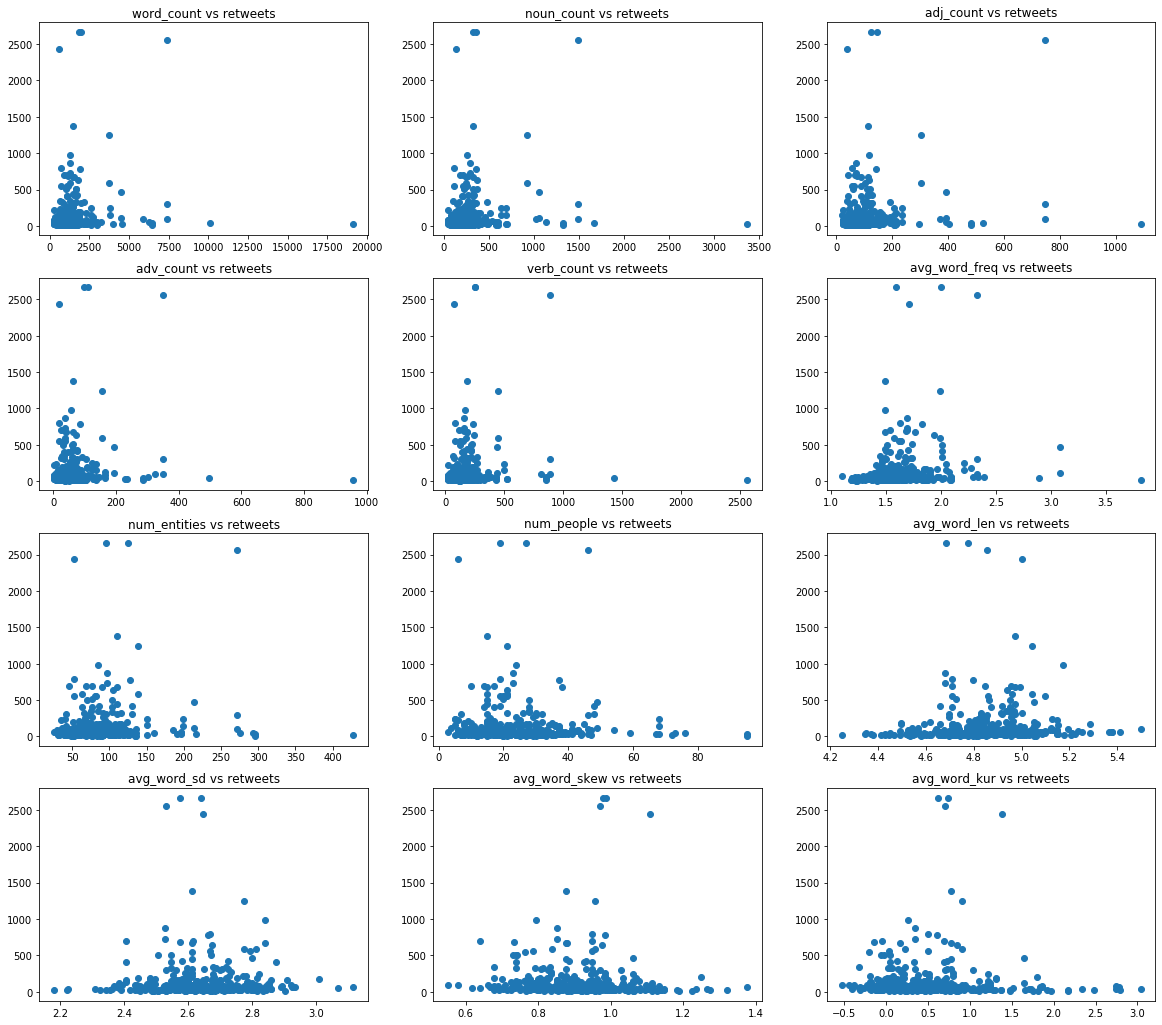

In [29]:
plot(iowa)

In [26]:
### Outliers
# df[df.retweets >= 10000]

In [27]:
# normalize columns
# X_norm = normalize(X, axis = 0, norm = 'l2')

## Methods

In [30]:
df = pd.read_pickle("feature_df.pkl")

In [42]:
display(df[0:3])

,retweets,timestamp,tokenized_words,word_count,tokenized_sentences,text_words_removed,lemmas,word_freq,part_of_speech,named_entity,...,adj_count,adv_count,verb_count,avg_word_freq,num_entities,num_people,avg_word_len,avg_word_sd,avg_word_skew,avg_word_kur
0,54,2019-10-14 23:45:05,"[Cara, Buckley, Tyler, Perry, hears, voices, i...",1332,[Cara Buckley Tyler Perry hears voices in his ...,"['Cara', 'Buckley', 'Tyler', 'Perry', 'hears',...","{Cara: 'Cara', Buckley: 'Buckley', Tyler: 'Tyl...","Counter({'Perry': 23, 'said': 13, 'black': 12,...","{Cara: 'PROPN', Buckley: 'PROPN', Tyler: 'PROP...","{'LAW': ['the Ultimate Icon Award '], 'TIME': ...",...,105,58,183,1.359667,72,20,4.493994,2.320905,0.984621,0.629332
1,18,2019-10-14 23:30:07,"[Robert, Leonard, Mr, Leonard, is, the, author...",1160,[Robert Leonard Mr Leonard is the author of De...,"['Robert', 'Leonard', 'Mr', 'Leonard', 'author...","{Robert: 'Robert', Leonard: 'Leonard', Mr: 'Mr...","Counter({'Mr': 16, 'Trump': 12, 'King': 9, 'Io...","{Robert: 'PROPN', Leonard: 'PROPN', Mr: 'PROPN...","{'TIME': ['the morning ', 'the evening '], 'PR...",...,89,61,118,1.448529,70,25,4.722414,2.655933,1.183618,1.660002
2,39,2019-10-14 23:15:04,"[Shuhan, Fan, and, Luther, Clement, Ms, Fan, a...",237,"[Shuhan Fan and Luther Clement, Ms Fan and Mr ...","['Shuhan', 'Fan', 'Luther', 'Clement', 'Ms', '...","{Shuhan: 'Shuhan', Fan: 'Fan', and: 'and', Lut...","Counter({'film': 6, 'Keeth': 5, 'Fan': 2, 'Lut...","{Shuhan: 'PROPN', Fan: 'PROPN', and: 'CCONJ', ...","{'ORG': ['Peter Westbrook Foundation ', 'the P...",...,15,9,33,1.198020,14,7,4.624473,2.388066,0.949981,0.710818


In [35]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
# must optimize hyperparameters; fit.optimize 
# kendall tau is nonparametric correlation coefficient: grab two articles at  random, what is prob that article
# has bigger score as output of model also has higher engagement 
# score of 1 means that your article ranks engagement perfectly, invariant under monotonic  transformations of 
# y variable.
# kendall tau, will coxin, AUC - relationship 

# give raw words in one-hot encoding of article to deep neural network. bert & elmo (deep learning embedding)

df = df.dropna(how='any',axis=0)

X = df[['word_count', 'noun_count', 'adj_count',
       'adv_count', 'verb_count', 'avg_word_freq', 'num_entities',
       'num_people', 'avg_word_len', 'avg_word_sd', 'avg_word_skew',
       'avg_word_kur']].copy().values

y = df[['retweets']].copy().values
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

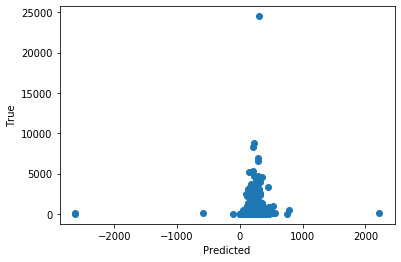

Kendall tau =  0.1421456426957196
p-value =  4.526569905058352e-38


In [37]:
# linear regression

from sklearn import linear_model
import scipy.stats as stats

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)

pred = reg.predict(X_test)

plt.plot(pred, y_test, 'o')
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

tau, p_value = stats.kendalltau(pred, y_test)

print("Kendall tau = ", tau)
print("p-value = ", p_value)

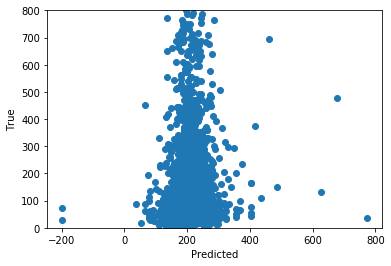

Kendall tau =  0.126604123921093
p-value =  1.4951237998082151e-30


In [31]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

plt.plot(pred, y_test, 'o')
plt.ylabel("True")
plt.xlabel("Predicted")
plt.ylim(0, 800)
plt.show()

tau, p_value = stats.kendalltau(pred, y_test)

print("Kendall tau = ", tau)
print("p-value = ", p_value)

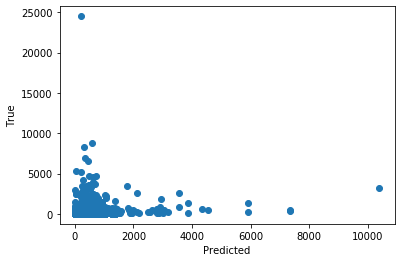

Kendall tau =  0.13020018572477968
p-value =  5.792814823584096e-32


In [32]:
# Gaussian naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

pred = gnb.predict(X_test)

plt.plot(pred, y_test, 'o')
plt.ylabel("True")
plt.xlabel("Predicted")
# plt.xlim(0, 2000)
# plt.ylim(0, 2000)
plt.show()

tau, p_value = stats.kendalltau(pred, y_test)

print("Kendall tau = ", tau)
print("p-value = ", p_value)

/Users/Kyelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


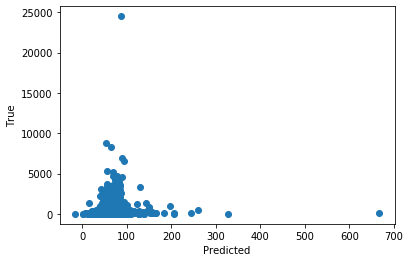

Kendall tau =  0.16020283557826404
p-value =  6.93593481731987e-48


In [59]:
# SVR 

from sklearn.svm import LinearSVR
clf = LinearSVR(max_iter = 10000)
clf.fit(X_train, y_train) 

pred = clf.predict(X_test)

plt.plot(pred, y_test, 'o')
plt.ylabel("True")
plt.xlabel("Predicted")
# plt.xlim(0, 2000)
# plt.ylim(0, 2000)
plt.show()

tau, p_value = stats.kendalltau(pred, y_test)

print("Kendall tau = ", tau)
print("p-value = ", p_value)

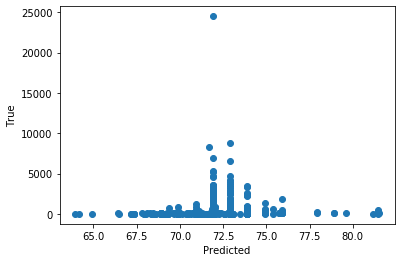

Kendall tau =  0.18964526134155643
p-value =  8.656704180140299e-62


In [60]:
from sklearn import svm
clf = svm.SVR(kernel='rbf', gamma = 'auto')
clf.fit(X_train, y_train) 

pred = clf.predict(X_test)

plt.plot(pred, y_test, 'o')
plt.ylabel("True")
plt.xlabel("Predicted")
# plt.xlim(0, 200)
# plt.ylim(0, 200)
plt.show()

tau, p_value = stats.kendalltau(pred, y_test)

print("Kendall tau = ", tau)
print("p-value = ", p_value)

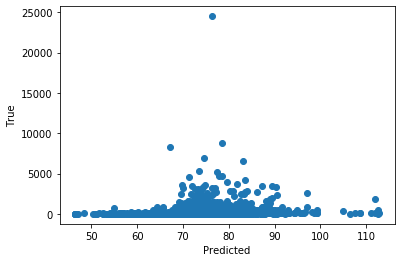

Kendall tau =  0.19387817583031033
p-value =  2.7272947573527343e-69


In [71]:
# Ensemble classifier
from sklearn.ensemble import BaggingRegressor
from sklearn import svm
# C is penalty of error term
# optimize C and gamma? 
bag = BaggingRegressor(svm.SVR(kernel = 'rbf', gamma = 'auto', C = 15), max_samples=0.5, max_features=0.5)
bag.fit(X_train, y_train)

pred = bag.predict(X_test)

plt.plot(pred, y_test, 'o')
plt.ylabel("True")
plt.xlabel("Predicted")
# plt.xlim(0, 200)
# plt.ylim(0, 200)
plt.show()

tau, p_value = stats.kendalltau(pred, y_test)

print("Kendall tau = ", tau)
print("p-value = ", p_value)

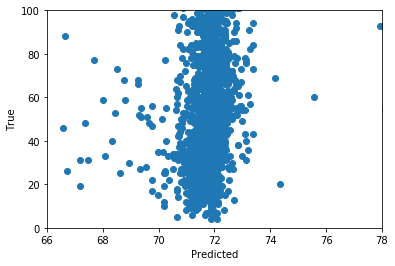

In [65]:
plt.plot(pred, y_test, 'o')
plt.ylabel("True")
plt.xlabel("Predicted")
plt.xlim(66, 78)
plt.ylim(0, 100)
plt.show()